# Ultrasound propagation in thermocline


Jupiter notebook specific imports

In [1]:
import os
os.chdir('../../../')
import warnings
warnings.filterwarnings('ignore')

PyWaveProp imports

In [2]:
from uwa.source import GaussSource
from uwa.environment import UnderwaterEnvironment, Bathymetry, sound_speed_mps
from uwa.sspade import UWASSpadeComputationalParams, uwa_ss_pade
from uwa.vis import AcousticPressureFieldVisualiser2d
from scipy.interpolate import interp1d

Preparing environment

In [3]:
max_range_m = 500
temp_profile = interp1d(x=[0, 6, 8, 20], y=[19, 19, 12, 7], fill_value="extrapolate")
env = UnderwaterEnvironment(
    sound_speed_profile_m_s=lambda x, z: sound_speed_mps(z, temp_profile(z), 0),
    bottom_profile=Bathymetry(
        ranges_m=[0, max_range_m],
        depths_m=[20, 30]),
    bottom_sound_speed_m_s = 1700,
    bottom_density_g_cm = 1.5,
    bottom_attenuation_dm_lambda = 0.01
)

## Antenna above the thermocline

Preparing transmitting antenna

In [4]:
src = GaussSource(
    freq_hz=30E3,
    depth_m=3,
    beam_width_deg=10,
    elevation_angle_deg=0,
    multiplier=5
)

Calculating the acoustics pressure field

In [5]:
params = UWASSpadeComputationalParams(
    max_range_m=max_range_m,
    max_depth_m=35,
    dx_m=0.1, # output grid steps affects only on the resulting field, NOT the computational grid
    dz_m=0.1,
)

In [6]:
field = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)

Visualising the results

Two dimensional distribution of the field amplitude

In [7]:
vis = AcousticPressureFieldVisualiser2d(field=field, env=env)

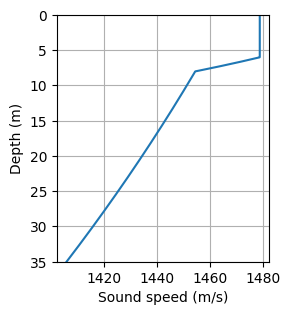

In [8]:
vis.sound_speed_profile().show()

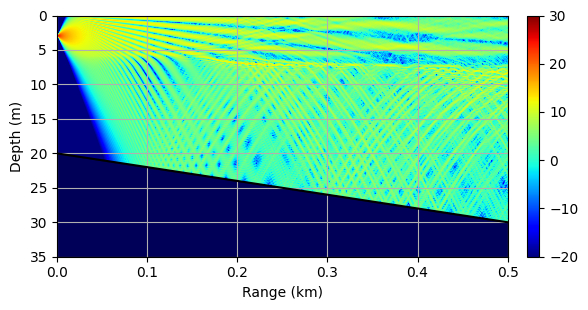

In [9]:
vis.plot2d(min_val=-20, max_val=30, grid=True, show_terrain=True).show()

## Antenna inside the thermocline

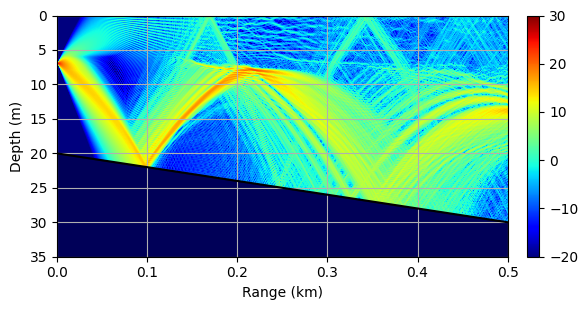

In [10]:
src.depth_m = 7
field2 = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)
vis2 = AcousticPressureFieldVisualiser2d(field=field2, env=env)
vis2.plot2d(min_val=-20, max_val=30, grid=True, show_terrain=True).show()

## Antenna below the thermocline

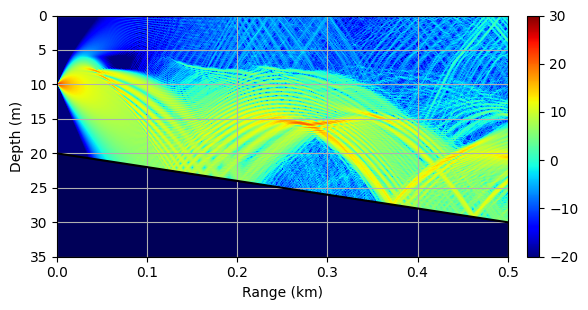

In [11]:
src.depth_m = 10
field3 = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)
vis3 = AcousticPressureFieldVisualiser2d(field=field3, env=env)
vis3.plot2d(min_val=-20, max_val=30, grid=True, show_terrain=True).show()

In [12]:
## Propagation without thermocline

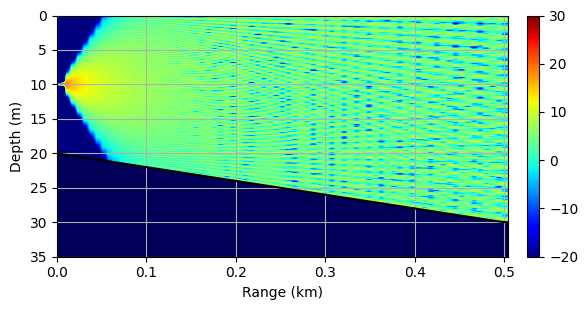

In [13]:
env.sound_speed_profile_m_s = lambda x, z: 1500+z*0
field4 = uwa_ss_pade(
    src=src,
    env=env,
    params=params
)
vis4 = AcousticPressureFieldVisualiser2d(field=field4, env=env)
vis4.plot2d(min_val=-20, max_val=30, grid=True, show_terrain=True).show()